<a href="https://colab.research.google.com/github/SLMath/pandas-dataframe/blob/main/Soccer_Olimpic_Games_Python_POO_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulação da Copa de Futebol das Olimpíadas!**

## **Objetivo**

Investigar as probabilidades dos resultados de futebol nas Olimpíadas de Tóquio 2021, respondendo as perguntas:

1. Qual seleção é mais provável ser campeã?
2. Quais as probabilidades das seleções avançarem para segunda fase?
3. Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
4. A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
5. Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')

6. Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
7. Qual a probabilidade de vencer a competição por confederação?
8. Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?

9. Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
10. Qual a probabilidade de cada grupo apresentar um campeão?

## **Importação dos Dados**

In [2]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/SLMath/pandas-dataframe/main/dados-futebol-olimpiada.csv', index_col=0)
display(data)
data.info()

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   País                    16 non-null     object
 1   Nome FIFA               16 non-null     object
 2   Grupo                   16 non-null     object
 3   Confederação            16 non-null     object
 4   Bandeira                16 non-null     object
 5   Cabeça-de-chave         16 non-null     object
 6   Ranking FIFA (07/04)    16 non-null     int64 
 7   Pontuação FIFA (07/04)  16 non-null     int64 
 8   Ouros                   16 non-null     int64 
 9   Pratas                  16 non-null     int64 
 10  Bronzes                 16 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 1.5+ KB


## **Gráficos dos Grupos**



In [3]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
from skimage import io

def plot_group(data, group):
    # filter the teams on the selected group
    group_data = data.loc[data['Grupo'] == group]
    assert group_data.size != 4, "the group must have 4 elements"

    # Initizalize image
    fig = plt.figure(figsize = (4, 3), facecolor='#FFFDEC')

    # Subplot 4 images as a four-point square on the figure, one for each country
    for i in range(4):
        image = plt.subplot(2, 2, i + 1)

        # remove axes
        image.get_xaxis().set_visible(False)
        image.get_yaxis().set_visible(False)

        # get the country name
        plt.title(group_data['País'].iloc[i], size = 10)

        # get the country flag image
        plt.imshow(io.imread( group_data['Bandeira'].iloc[i] ))

    # Gather then all
    plt.tight_layout(w_pad = 2)
    plt.suptitle('Grupo ' + group, size = 14, y = 1.05)
    # plt.savefig('grupo' + grupo + '.png', transparent = True)

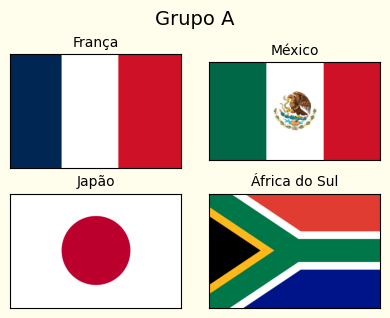

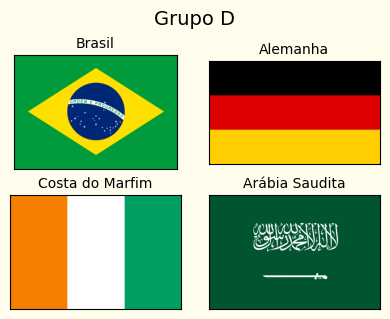

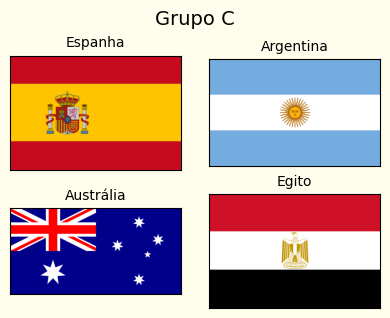

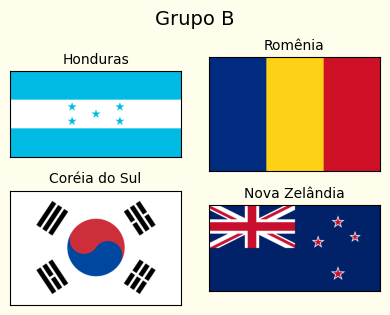

In [5]:
for group in data['Grupo'].unique():
  plot_group(data, group)

## **Modelando o resultado de um jogo**

Assume-se que a distribuição de gols numa partida por uma equipe siga uma distribuiçao Poisson, pois queremos determinar a probabilidade para cada número (inteiro não negativo) de gols por partida (um intervalo de 90 minutos). Portanto deve-se ter como premissa:

1. O adversário não influencia o resultado da equipe, assim a probabilidade mantem-se a mesma em toda partida
2. Os jogos passados não influenciam o jogo presente, assim os eventos são independentes entre si.

Logo, estimar a média dessa distribuição, correspondente ao parâmetro lambda, significa estimar a média do número de gols da equipe em uma partida. Induziremos esse número a partir da Pontuação FIFA (07/04/21) pensando que esse dado não varia muito além de 1 para as equipes.  

In [6]:
# Creating a Quadratic Relative Score
max_mean_score = 1.5 # set a max score for the best team
max_FIFA_score = data['Pontuação FIFA (07/04)'].max()
data['Quad Rel Score'] = max_mean_score * ((data['Pontuação FIFA (07/04)'] / max_FIFA_score) ** 2)
display(data)

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Quad Rel Score
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.500000
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.474497
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.319660
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.308473
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.289407
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.257940
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.900045
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.106436
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,1.020198
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,1.035746


In [7]:
from scipy.stats import poisson

# avaliating simulated data
# simulate
n_simus = 100000
brazil_score = data[data['País'] == 'Brasil']['Quad Rel Score']
brazil_score_simu = pd.DataFrame(
    data= poisson.rvs(mu= brazil_score, size= n_simus),
    columns = ['score'])

In [8]:
# plot frequency table
sum_brazil_score_simu = brazil_score_simu.groupby(['score']).size().reset_index(name= 'counts')
sum_brazil_score_simu['P(%)'] = sum_brazil_score_simu['counts'] * 100 / n_simus
display(sum_brazil_score_simu)

,score,counts,P(%)
0,0,22738,22.738
1,1,33682,33.682
2,2,25032,25.032
3,3,12232,12.232
4,4,4540,4.540
5,5,1353,1.353
6,6,345,0.345
7,7,58,0.058
8,8,14,0.014
9,9,5,0.005


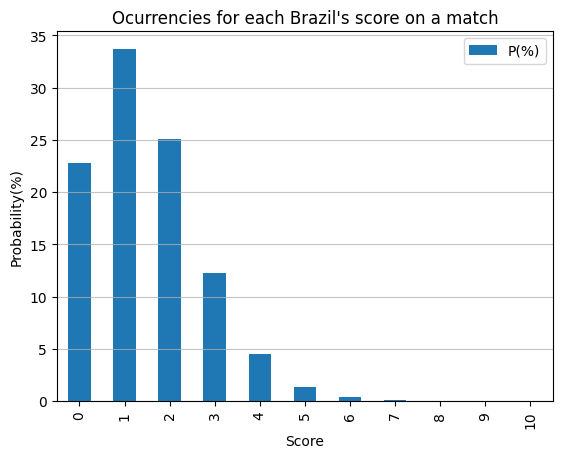

In [9]:
import numpy as np

# plot count plot graph
sum_brazil_score_simu.plot.bar(x = 'score', y = 'P(%)')
plt.title('Ocurrencies for each Brazil\'s score on a match')
plt.xlabel('Score')
plt.ylabel('Probability(%)')
plt.grid(axis='y', alpha=0.75)

É notável que existe uma clara tendência em marcar 1 gol apenas ($\approx 34\%$), tendendo mais a ser 2 que 0, como era esperado pela média de gols derivada da pontuação FIFA

Logo podemos simular uma partida entre duas equipes com esse modelo

In [10]:
import random
random.seed(42)

class Team:
  def __init__(self, name: str, team_score: float = -1):
    self.name = name
    self.team_score = team_score if team_score != -1\
        else float(data.loc[data['País'] == self.name]['Quad Rel Score'])
    self.acc_goals = 0
    self.goal_diff = 0
    self.points = 0

  def get_match_score(self):
    self.last_score = poisson.rvs(mu= self.team_score, size = 1)[0]
    self.acc_goals += self.last_score
    return self.last_score

  def get_penalties_score(self, knockout: bool = False): # famous "mata-mata"
    return random.randrange(2) if knockout else sum([random.randrange(2) for i in range(5)])

  def win(self, match_goal_diff: int):
    self.points += 2
    self.goal_diff += match_goal_diff

  def tie(self):
    self.points += 1

  def lose(self, match_goal_diff: int):
    self.goal_diff -= match_goal_diff

  # overloading operator * to simulate a non-knockout match
  # return: string to display match result, the winner (or 0 if a tie)
  def __mul__(self, other):
    # get match result as goal diff
    match_goal_diff = self.get_match_score() - other.get_match_score()

    # determine match result
    if match_goal_diff > 0:
      winner, loser = self, other
    elif match_goal_diff < 0:
      winner, loser = other, self
    else:
      winner = 'none'
      loser = 'none'

    # update team values and write match result
    if winner != 'none':
      winner.win(match_goal_diff)
      loser.lose(match_goal_diff)
      result = f'{winner.name} {winner.last_score} x {loser.last_score} {loser.name}'

    else:
      self.tie()
      other.tie()
      result = f'{self.name} {self.last_score} x {other.last_score} {other.name}'

    # return values
    return result, winner, loser

  # overloading operator ^ to simulate a knockout match
  # return: string to display match result, the winner
  def __xor__(self, other):
    strResult, winner, loser = self * other

    # check weather match ended as tie
    if winner == 'none':
      # get penaulties scores for each team
      self_penalty_score = self.get_penalties_score()
      other_penalty_score = other.get_penalties_score()

      while winner == 'none': # match is on penalties
        # determines who has won
        if self_penalty_score > other_penalty_score:
          winner, loser = self, other
          winner_penalty_score, loser_penalty_score = self_penalty_score, other_penalty_score

        elif self_penalty_score < other_penalty_score:
          winner, loser = other, self
          winner_penalty_score, loser_penalty_score = other_penalty_score, self_penalty_score

        else:
          self_penalty_score += self.get_penalties_score(knockout= True)
          other_penalty_score += bool(other.get_penalties_score(knockout= True))

      strResult = f'{winner.name} {winner.last_score} ({winner_penalty_score})'\
      f' x {loser.last_score} {loser.name} ({loser_penalty_score})'

    # return values
    return strResult, winner, loser

  # overloading converter to string for printing purpouses
  def __str__(self):
    return f'name: {self.name}, points: {self.points}, goalDiff: {self.goal_diff}, accGoals: {self.acc_goals}'

In [11]:
## TESTING
# create two teams
my_team = Team('Brasil')
their_team = Team('Egito')
print(my_team)
print(their_team)

# simulate a non-knockout match
result, winner, loser = my_team * their_team
print()
print('A Simple Match')
print(result)
print('winner:', winner)
print('loser:', loser)

# simulate a knockout match
result, winner, loser = my_team ^ their_team
print()
print('A Knockout Match')
print(result)
print('winner:', winner)
print('loser:', loser)

name: Brasil, points: 0, goalDiff: 0, accGoals: 0
name: Egito, points: 0, goalDiff: 0, accGoals: 0

A Simple Match
Brasil 1 x 1 Egito
winner: none
loser: none

A Knockout Match
Brasil 1 x 0 Egito
winner: name: Brasil, points: 3, goalDiff: 1, accGoals: 2
loser: name: Egito, points: 1, goalDiff: -1, accGoals: 1


## **Simulação dos jogos de futebol nas Olimpíadas**



Primeiro, os times passam pela fase de grupo. Nela, cada time joga contra os outros 3 membros do grupo e os 2 melhores são classificados para as quartas de final

In [12]:
# simulate all matches between the 4 teams and returns the 2 classified as a DataFrame
def simulate_group_matches(data: pd.DataFrame, group: str, verbose: bool = True):
  # get Group Data
  if verbose: print('Grupo', group)
  group_df = data[data['Grupo'] == group]
  assert group_df.size != 4, "the group must have 4 elements"

  # create Team objetcs for group
  group_teams = [Team(name= country) for country in group_df['País']]

  # simulate each match on the group
  group_rivals = group_teams.copy()
  for team1 in group_teams:
    group_rivals.remove(team1)

    for team2 in group_rivals:
      result, *_ = team1 * team2
      if verbose: print(result)

  # transform list of Team objects into a DataFrame
  group_teams_df = pd.DataFrame(vars(team) for team in group_teams) # vars -> __dict__ function: default in a class is to create a dict { all_properties : value }
  group_teams_df['group'] = group

  # Classify the teams according to firts its points, second its goals diff score, and thirs its accumulate goals
  group_teams_df.sort_values(
      ['points', 'goal_diff', 'acc_goals'],
      ascending= False,
      inplace= True,
      ignore_index= True)
  group_teams_df['classification'] = group_teams_df.index + 1
  if verbose: display(group_teams_df)

  return group_teams_df[['group', 'classification', 'name', 'team_score']][group_teams_df['classification'] <= 2]

simulate_group_matches(data, "A")

Grupo A
França 1 x 0 México
França 3 x 1 Japão
França 0 x 0 África do Sul
México 2 x 1 Japão
África do Sul 2 x 0 México
Japão 1 x 0 África do Sul


,name,team_score,acc_goals,goal_diff,points,last_score,group,classification
0,França,1.500000,4,3,5,0,A,1
1,África do Sul,0.853060,2,-3,3,0,A,2
2,México,1.289407,2,2,2,0,A,3
3,Japão,1.106436,3,-2,2,1,A,4


,group,classification,name,team_score
0,A,1,França,1.50000
1,A,2,África do Sul,0.85306


In [13]:
# returns the two classified from each group in a df
def simulate_group_phase(data: pd.DataFrame, verbose: bool = True):
    classified_df = pd.DataFrame()
    for group in np.sort(data['Grupo'].unique()):
        classif_group = simulate_group_matches(data, group, verbose)
        classified_df = pd.concat([classified_df, classif_group], ignore_index= True)

    if verbose:
        print('=' * 100)
        print('Classified Teams')
        display(classified_df)

    return classified_df

testing_gp = simulate_group_phase(data)

Grupo A
México 2 x 1 França
França 3 x 0 Japão
França 3 x 1 África do Sul
México 2 x 0 Japão
México 3 x 1 África do Sul
Japão 1 x 1 África do Sul


,name,team_score,acc_goals,goal_diff,points,last_score,group,classification
0,México,1.289407,7,3,6,3,A,1
1,França,1.500000,7,6,4,3,A,2
2,África do Sul,0.853060,3,-4,1,1,A,3
3,Japão,1.106436,1,-5,1,1,A,4


Grupo B
Romênia 1 x 0 Honduras
Coréia do Sul 2 x 0 Honduras
Honduras 1 x 1 Nova Zelândia
Romênia 1 x 0 Coréia do Sul
Nova Zelândia 2 x 0 Romênia
Nova Zelândia 2 x 0 Coréia do Sul


,name,team_score,acc_goals,goal_diff,points,last_score,group,classification
0,Nova Zelândia,0.641487,5,-4,5,2,B,1
1,Romênia,1.020198,2,2,4,0,B,2
2,Coréia do Sul,1.035746,2,-1,2,0,B,3
3,Honduras,0.900045,1,3,1,1,B,4


Grupo C
Espanha 1 x 0 Argentina
Espanha 2 x 1 Austrália
Egito 1 x 0 Espanha
Austrália 3 x 1 Argentina
Argentina 2 x 1 Egito
Egito 2 x 0 Austrália


,name,team_score,acc_goals,goal_diff,points,last_score,group,classification
0,Espanha,1.319660,3,3,4,0,C,1
1,Egito,0.996400,4,-4,4,2,C,2
2,Argentina,1.308473,3,2,2,2,C,3
3,Austrália,1.031494,4,-1,2,0,C,4


Grupo D
Alemanha 1 x 0 Brasil
Brasil 2 x 0 Costa do Marfim
Brasil 0 x 0 Arábia Saudita
Alemanha 0 x 0 Costa do Marfim
Alemanha 0 x 0 Arábia Saudita
Costa do Marfim 3 x 0 Arábia Saudita


,name,team_score,acc_goals,goal_diff,points,last_score,group,classification
0,Alemanha,1.257940,1,-1,4,0,D,1
1,Brasil,1.474497,2,3,3,0,D,2
2,Costa do Marfim,0.930722,3,1,3,3,D,3
3,Arábia Saudita,0.904017,0,-3,2,0,D,4


Classified Teams


,group,classification,name,team_score
0,A,1,México,1.289407
1,A,2,França,1.500000
2,B,1,Nova Zelândia,0.641487
3,B,2,Romênia,1.020198
4,C,1,Espanha,1.319660
5,C,2,Egito,0.996400
6,D,1,Alemanha,1.257940
7,D,2,Brasil,1.474497


O restante dos jogo são mata-mata na configuração:

Quartas de Final\
Q1: 1A vs 2B\
Q2: 1B vs 2A\
Q3: 1C vs 2D\
Q4: 1D vs 2C

Semi-Final\
S1: Vencedor(Q1) x Vencedor(Q2)\
S2: Vencedor(Q3) x Vencedor(Q4)

Final\
Vencedor(S1) x Vencedor(S2)

In [14]:
# simulate quarter finals
def simulate_quarters(teams_df: pd.DataFrame, verbose: bool = True):
    if verbose: print('QUARTER FINALS')

    # manually describing the matches that will occur
    quarters_matches = [
        { 'id' : 'Q1', 'team1' : { 'group' : 'A', 'classif' : 1 }, 'team2' : { 'group' : 'B', 'classif' : 2 }},
        { 'id' : 'Q2', 'team1' : { 'group' : 'B', 'classif' : 1 }, 'team2' : { 'group' : 'A', 'classif' : 2 }},
        { 'id' : 'Q3', 'team1' : { 'group' : 'C', 'classif' : 1 }, 'team2' : { 'group' : 'D', 'classif' : 2 }},
        { 'id' : 'Q4', 'team1' : { 'group' : 'D', 'classif' : 1 }, 'team2' : { 'group' : 'C', 'classif' : 2 }},
    ]

    # simulate knockout matches for each quarter group
    semifinalists = []
    for quarter in quarters_matches:
        # get team 1 data
        group1, classif1 = quarter['team1']['group'], quarter['team1']['classif']
        team1_series = teams_df[(teams_df['group'] == group1) & (teams_df['classification'] == classif1)].iloc[0]
        team1 = Team(name= team1_series['name'], team_score= team1_series['team_score'])

        # get team 2 data
        group2, classif2 = quarter['team2']['group'], quarter['team2']['classif']
        team2_series = teams_df[(teams_df['group'] == group2) & (teams_df['classification'] == classif2)].iloc[0]
        team2 = Team(name= team2_series['name'], team_score= team2_series['team_score'])

        # knockout match
        result, winner, loser = team1 ^ team2
        semifinalists.append({ 'data' : winner, 'quarter' : quarter['id'] })
        if verbose: print(result)

    # Creating Dataframe with the semifinalists only
    semifinalists_df = pd.DataFrame(
        {
            'team' : semifinalist['data'].name,
            'quarter' : semifinalist['quarter']
        } for semifinalist in semifinalists
    ).set_index('quarter')
    if verbose: display(semifinalists_df)

    # return results
    return semifinalists, semifinalists_df

testing_Q_list, testing_Q_df = simulate_quarters(testing_gp)
print(testing_Q_list)
print(testing_Q_df)

QUARTER FINALS
México 2 x 0 Romênia
França 3 x 1 Nova Zelândia
Espanha 0 (2) x 0 Brasil (1)
Alemanha 1 (4) x 1 Egito (3)


,team
quarter,
Q1,México
Q2,França
Q3,Espanha
Q4,Alemanha


[{'data': <__main__.Team object at 0x7f2bb667f760>, 'quarter': 'Q1'}, {'data': <__main__.Team object at 0x7f2bb667fe80>, 'quarter': 'Q2'}, {'data': <__main__.Team object at 0x7f2bb667dab0>, 'quarter': 'Q3'}, {'data': <__main__.Team object at 0x7f2bb667fe50>, 'quarter': 'Q4'}]
             team
quarter          
Q1         México
Q2         França
Q3        Espanha
Q4       Alemanha


In [15]:
from typing import List, Dict, Union

# simulate semifinals
def simulate_semifinals(semifanalists: List[Dict[str, Union[Team, str]]], verbose: bool = True):
    if verbose: print('SEMIFINALS')

    # manually describing the matches that will occur
    semifinal_matches = [
        { 'id' : 'S1', 'team1' : 'Q1', 'team2' : 'Q2' },
        { 'id' : 'S2', 'team1' : 'Q3', 'team2' : 'Q4' }
    ]

    finalists = []
    for semifinal in semifinal_matches:
        # get team 1 data
        team1 = list(filter(
            lambda semifinalist: semifinalist['quarter'] == semifinal['team1'],
            semifanalists
        ))[0]
        team1 = team1['data']

        # get team 2 data
        team2 = list(filter(
            lambda semifinalist: semifinalist['quarter'] == semifinal['team2'],
            semifanalists
        ))[0]
        team2 = team2['data']

        # knockout match
        result, winner, loser = team1 ^ team2
        finalists.append({ 'data' : winner, 'victory' : True, 'semifinal' : semifinal['id'] })
        finalists.append({ 'data' : loser, 'victory' : False, 'semifinal' : semifinal['id'] })
        if verbose: print(result)

    # return results
    return finalists

testing_S_list = simulate_semifinals(testing_Q_list)
print(testing_S_list)

SEMIFINALS
França 1 x 0 México
Alemanha 2 x 0 Espanha
[{'data': <__main__.Team object at 0x7f2bb667fe80>, 'victory': True, 'semifinal': 'S1'}, {'data': <__main__.Team object at 0x7f2bb667f760>, 'victory': False, 'semifinal': 'S1'}, {'data': <__main__.Team object at 0x7f2bb667fe50>, 'victory': True, 'semifinal': 'S2'}, {'data': <__main__.Team object at 0x7f2bb667dab0>, 'victory': False, 'semifinal': 'S2'}]


In [16]:
# simulate finals
def simulate_finals(finalists: List[Dict[str, Union[Team, bool, str]]], verbose: bool= True):
    if verbose: print('FINALS')

    # manually describing the matches that will occur
    finals_matches = [
        { 'id' : 'Gold', 'won_semi' : True, 'team1' : 'S1', 'team2' : 'S2' },
        { 'id' : 'Bronze', 'won_semi' : False, 'team1' : 'S1', 'team2' : 'S2' }
    ]

    podium = []
    for final in finals_matches:
        # get team 1 data
        team1 = list(filter(
            lambda finalist: (
                finalist['semifinal'] == final['team1'] and
                finalist['victory'] == final['won_semi']
            ),
            finalists
        ))[0]
        team1 = team1['data']

        # get team 2 data
        team2 = list(filter(
            lambda finalist: (
                finalist['semifinal'] == final['team2'] and
                finalist['victory'] == final['won_semi']
            ),
            finalists
        ))[0]
        team2 = team2['data']

        # knockout match
        result, winner, loser = team1 ^ team2
        podium.append({ 'data' : winner, 'victory' : True, 'final' : final['id'] })
        podium.append({ 'data' : loser, 'victory' : False, 'final' : final['id'] })
        if verbose: print(result)

    # Create podium df
    # gold medalist
    team = list(filter(
        lambda team: team['final'] == 'Gold' and team['victory'],
        podium
    ))[0]['data']
    podium_df = pd.DataFrame({ 'team' : team.name }, index= ['Gold'])

    # silver medalist
    team = list(filter(
        lambda team: team['final'] == 'Gold' and not team['victory'],
        podium
    ))[0]['data']
    podium_df = pd.concat([
        podium_df,
        pd.DataFrame({ 'team' : team.name }, index= ['Silver'])
    ])

    # bronze medalist
    team = list(filter(
        lambda team: team['final'] == 'Bronze' and team['victory'],
        podium
    ))[0]['data']
    podium_df = pd.concat([
        podium_df,
        pd.DataFrame({ 'team' : team.name }, index= ['Bronze'])
    ])

    podium_df.index.name = 'medal'

    # return results
    return podium, podium_df

simulate_finals(testing_S_list)

FINALS
Alemanha 3 x 1 França
Espanha 1 x 0 México


([{'data': <__main__.Team at 0x7f2bb667fe50>,
   'victory': True,
   'final': 'Gold'},
  {'data': <__main__.Team at 0x7f2bb667fe80>,
   'victory': False,
   'final': 'Gold'},
  {'data': <__main__.Team at 0x7f2bb667dab0>,
   'victory': True,
   'final': 'Bronze'},
  {'data': <__main__.Team at 0x7f2bb667f760>,
   'victory': False,
   'final': 'Bronze'}],
             team
 medal           
 Gold    Alemanha
 Silver    França
 Bronze   Espanha)

In [17]:
def simulate_knockout_phase(classified_teams_df: pd.DataFrame, verbose: bool = True):
    # QUARTERS
    semifinalists_data, semifinalists_df = simulate_quarters(classified_teams_df, verbose= verbose)

    # SEMIFINALS
    if verbose: print()
    semifinalists = simulate_semifinals(semifinalists_data, verbose= verbose)

    # FINALS
    if verbose: print()
    _, podium = simulate_finals(semifinalists, verbose= verbose)

    return semifinalists_df, podium

simulate_knockout_phase(testing_gp)

QUARTER FINALS
Romênia 2 x 0 México
França 3 x 0 Nova Zelândia
Espanha 1 x 0 Brasil
Alemanha 3 x 1 Egito


,team
quarter,
Q1,Romênia
Q2,França
Q3,Espanha
Q4,Alemanha



SEMIFINALS
Romênia 1 (4) x 1 França (3)
Alemanha 2 x 1 Espanha

FINALS
Alemanha 1 (2) x 1 Romênia (1)
Espanha 1 x 0 França


(             team
 quarter          
 Q1        Romênia
 Q2         França
 Q3        Espanha
 Q4       Alemanha,
             team
 medal           
 Gold    Alemanha
 Silver   Romênia
 Bronze   Espanha)

Basta, então unir as fases de grupo e de mata-mata para simular o futebol nas olimpíadas por completo

In [18]:
def simulate_olimpics_soccer(data: pd.DataFrame, verbose: bool = True):
    # simulate matches
    classifieds = simulate_group_phase(data, verbose= verbose)
    semifinalists, podium = simulate_knockout_phase(classifieds, verbose= verbose)

    # creating a dataframe to display overall results
    # table labels
    performance = ['Group-1st', 'Group-2nd', 'Semifinal', 'Bronze', 'Silver', 'Gold']
    teams = data['País'].to_list()
    # table data initialized as 0
    n_rows, n_cols = len(teams), len(performance)
    null_matrix = np.zeros((n_rows, n_cols))
    info = pd.DataFrame(null_matrix, columns= performance, index= teams)
    info = info.astype(int) # since it sets to float by default

    # compose the actual data to the dataframe
    # mark the team classified in 1st at group phase
    for _, team in classifieds[classifieds['classification'] == 1].iterrows():
        info.at[team['name'], 'Group-1st'] = 1
    # mark the team classified in 2nd at group phase
    for _, team in classifieds[classifieds['classification'] == 2].iterrows():
        info.at[team['name'], 'Group-2nd'] = 1
    # mark the team classified to the semifinals
    semifinalist_names = semifinalists['team']
    info.loc[semifinalist_names, 'Semifinal'] = 1
    # mark the team who own any medal
    for medal, winner in podium.iterrows():
        info.at[winner['team'], medal] = 1

    # exhibit data table
    if verbose: display(info)

    # return values
    return info

simulate_olimpics_soccer(data, False)

,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,1,0,1,0,1,0
Brasil,1,0,1,0,0,1
Espanha,1,0,0,0,0,0
Argentina,0,1,0,0,0,0
México,0,0,0,0,0,0
Alemanha,0,1,1,1,0,0
Honduras,0,0,0,0,0,0
Japão,0,0,0,0,0,0
Romênia,0,1,0,0,0,0
Coréia do Sul,0,0,0,0,0,0


## **Criando alguns dados estatísticos**

Simulando diversas vezes os resultados, pode-se criar uma análise estatística de probabilidade de cada equipe ter um determinado desempenho

In [19]:
def statistics_data_for_olimpics_soccer(data, iterations = 1000):
    print('Iniciando simulação...')

    # compute the total each team reaches each performance
    info = simulate_olimpics_soccer(data, False)
    for i in range(iterations - 1):
        info += simulate_olimpics_soccer(data, False)

        # DEBUG: everytime it computes more 10% of the samples, a message is displayed
        if (i + 1) % (iterations / 10) == 0:
            print(f'Simulando Copa: {(i + 1) / iterations:.0%}% pronto')

    # sort data on table and display the statistics as percentage probability
    info = 100 * info.sort_values(by = 'Gold', ascending = False) / iterations
    return info

In [20]:
soccer_statistics = statistics_data_for_olimpics_soccer(data, 1000)
display(soccer_statistics)

Iniciando simulação...
Simulando Copa: 10%% pronto
Simulando Copa: 20%% pronto
Simulando Copa: 30%% pronto
Simulando Copa: 40%% pronto
Simulando Copa: 50%% pronto
Simulando Copa: 60%% pronto
Simulando Copa: 70%% pronto
Simulando Copa: 80%% pronto
Simulando Copa: 90%% pronto


,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,44.9,27.2,46.6,9.7,13.3,14.5
Brasil,46.9,26.0,41.0,9.0,10.0,14.3
Espanha,38.9,27.1,35.0,9.7,7.6,10.0
Argentina,31.2,30.0,33.4,8.8,8.4,9.8
Alemanha,28.1,32.2,29.0,7.5,6.7,9.4
México,29.3,30.0,34.4,7.0,9.2,8.8
Romênia,32.6,27.6,26.4,6.3,6.3,5.6
Japão,17.1,27.7,24.6,4.9,8.0,5.2
Coréia do Sul,24.6,25.7,24.1,7.2,6.1,4.7
Honduras,32.3,27.5,23.6,5.3,6.4,4.2


In [21]:
data_with_statistics = data.set_index('País')
data_with_statistics = pd.concat(
        [data_with_statistics, soccer_statistics],
        axis = 1
    ).sort_values(by= 'Gold', ascending = False)
display(data_with_statistics)

,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Quad Rel Score,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.500000,44.9,27.2,46.6,9.7,13.3,14.5
Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.474497,46.9,26.0,41.0,9.0,10.0,14.3
Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.319660,38.9,27.1,35.0,9.7,7.6,10.0
Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.308473,31.2,30.0,33.4,8.8,8.4,9.8
Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.257940,28.1,32.2,29.0,7.5,6.7,9.4
México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.289407,29.3,30.0,34.4,7.0,9.2,8.8
Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,1.020198,32.6,27.6,26.4,6.3,6.3,5.6
Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.106436,17.1,27.7,24.6,4.9,8.0,5.2
Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,1.035746,24.6,25.7,24.1,7.2,6.1,4.7
Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.900045,32.3,27.5,23.6,5.3,6.4,4.2


Abstraindo um pouco além, pode-se explorar a probabilidade dos resultados em um jogo entre duas equipes

In [37]:
def result_probability(team_name: str, opponent_name: str, S= 1000, verbose: bool = False):
    # construct Team objects
    team = Team(team_name)
    opponent = Team(opponent_name)

    # simulate S matches and save its results one by one
    def get_scores():
        team * opponent
        return {team_name : team.last_score, opponent_name : opponent.last_score}

    match_scores = pd.DataFrame( get_scores() for _ in range(S) ).astype(int)

    if verbose: display(match_scores.transpose())

    # count the repeated results
    counted_match_scores = match_scores.groupby([team_name, opponent_name])\
        .agg(occurs= (team_name, 'count')).reset_index()
    if verbose: display(counted_match_scores)

    # wide to long for better visualization (1D matrix representation to 2D)
    # provides easier access: (call for probMatrixMatch_scores.at[teamScore, opponentScore])
    counted_match_scores = counted_match_scores.pivot(
        index= team_name,
        columns= opponent_name,
        values='occurs'
    )
    prob_match_scores = 100 * counted_match_scores.fillna(0) / S
    if verbose: display(prob_match_scores)

    # return statistics data
    return prob_match_scores

_ = result_probability('Brasil', 'Alemanha', 100000, verbose= True)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Brasil,0,2,2,1,0,1,0,3,1,1,...,1,1,1,3,1,1,3,3,0,1
Alemanha,1,2,4,2,2,2,2,2,1,0,...,1,0,2,1,0,1,2,1,1,0


,Brasil,Alemanha,occurs
0,0,0,6464
1,0,1,8106
2,0,2,5167
3,0,3,2079
4,0,4,687
...,...,...,...
61,8,1,3
62,8,2,2
63,9,0,1
64,9,1,2


Alemanha,0,1,2,3,4,5,6,7,8
Brasil,,,,,,,,,
0,6.464,8.106,5.167,2.079,0.687,0.172,0.034,0.007,0.005
1,9.484,12.163,7.533,3.264,0.974,0.274,0.050,0.011,0.000
2,7.007,9.052,5.658,2.375,0.718,0.187,0.040,0.005,0.000
3,3.541,4.334,2.749,1.115,0.350,0.099,0.023,0.005,0.000
4,1.262,1.662,1.038,0.412,0.121,0.031,0.005,0.001,0.000
5,0.409,0.458,0.273,0.123,0.047,0.010,0.003,0.000,0.000
6,0.093,0.117,0.075,0.032,0.013,0.006,0.001,0.000,0.000
7,0.014,0.028,0.014,0.006,0.001,0.000,0.000,0.000,0.000
8,0.004,0.003,0.002,0.000,0.000,0.000,0.000,0.000,0.000


---

## **Respondendo as Perguntas com base nos dados estatisticos simulados**

*Questão 1: Qual seleção é mais provável ser campeã?*

In [ ]:
display(data_with_statistics.index[0])

'França'

*Questão 2: Quais as probabilidades das seleções avançarem para segunda fase?*

In [ ]:
quarters_probs = pd.DataFrame(index= data_with_statistics.index)
quarters_probs['quarter (%)'] = data_with_statistics['Group-1st'] + data_with_statistics['Group-2nd']
display(quarters_probs.transpose())

,França,Brasil,Argentina,México,Espanha,Alemanha,Japão,Coréia do Sul,Romênia,Honduras,Austrália,Costa do Marfim,Egito,Arábia Saudita,África do Sul,Nova Zelândia
quarter (%),72.8,74.0,63.6,57.2,63.3,59.1,41.4,56.7,61.3,55.0,40.7,38.1,32.4,28.8,28.6,27.0


*Questão 3: Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?*

In [ ]:
group_probs = data_with_statistics[['Group-1st', 'Group-2nd']].copy()
group_probs.rename(columns= {'Group-1st' : '1st(%)', 'Group-2nd' : '2nd(%)'}, inplace= True)
group_probs['3rd or 4th(%)'] = 100 - group_probs['1st(%)'] + group_probs['2nd(%)']
display(group_probs.transpose())

,França,Brasil,Argentina,México,Espanha,Alemanha,Japão,Coréia do Sul,Romênia,Honduras,Austrália,Costa do Marfim,Egito,Arábia Saudita,África do Sul,Nova Zelândia
1st(%),47.5,44.7,34.6,28.1,35.5,30.5,14.4,27.5,34.6,28.1,16.4,14.0,13.5,10.8,10.0,9.8
2nd(%),25.3,29.3,29.0,29.1,27.8,28.6,27.0,29.2,26.7,26.9,24.3,24.1,18.9,18.0,18.6,17.2
3rd or 4th(%),77.8,84.6,94.4,101.0,92.3,98.1,112.6,101.7,92.1,98.8,107.9,110.1,105.4,107.2,108.6,107.4


*Questão 4: A força(média de gols na partida) de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?*

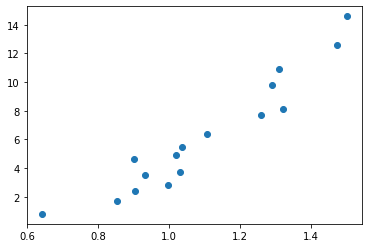

In [ ]:
plt.scatter(data_with_statistics['Avg Score'], data_with_statistics['Gold']);

Embora sejam variáveis correlacionadas, a "força" não é o único fator, pois há dependencia também da sequência de partidas contra adversários diferentes

*Questão 5: Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')*


In [ ]:
# the intersection probability is multiplication of the probabilities if they are independent
group_favs = data_with_statistics.loc[data_with_statistics['Cabeça-de-chave'] == 'Sim']
print('{:0.1f}%'.format(100 * (group_favs['Group-1st'] / 100 + group_favs['Group-2nd'] / 100).prod()))

19.3%


*Questão 6: Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?*


In [ ]:
weaskest_teams = data_with_statistics.sort_values(by = 'Ranking FIFA (07/04)', ascending = False).iloc[:4]
print('{:0.1f}%'.format(weaskest_teams['Gold'].sum()))

9.5%


*Questão 7: Qual a probabilidade de vencer a competição por confederação?*


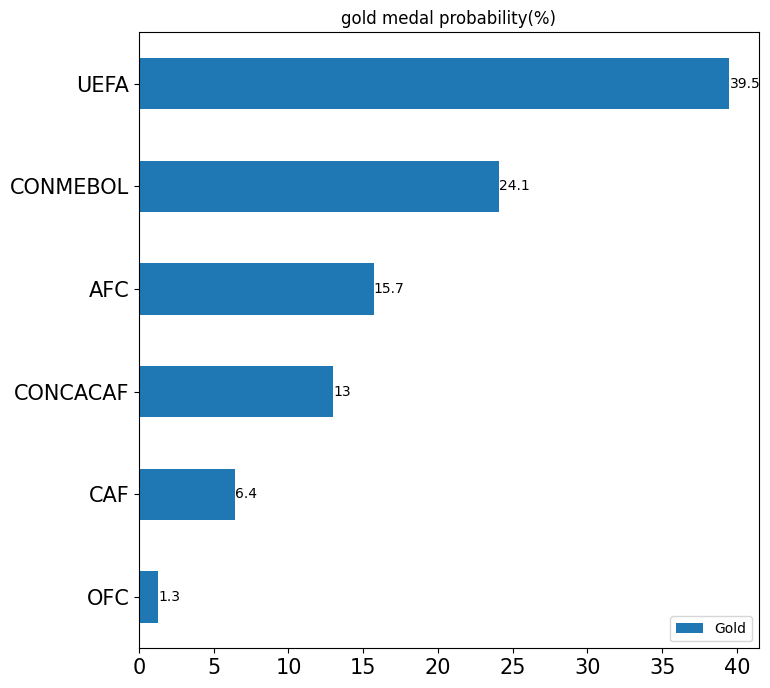

In [51]:
confed_gold_data = data_with_statistics[['Gold']].groupby(
    data_with_statistics['Confederação']).sum()

ax = confed_gold_data.sort_values('Gold').plot(
    kind= 'barh',
    y= 'Gold',
    figsize= (8,8),
    fontsize= 15,
    title= 'gold medal probability(%)',
    ylabel= ''
)

_= ax.bar_label(ax.containers[0])

*Questão 8: Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?*


In [52]:
team_without_medals = data_with_statistics[data_with_statistics['Ouros'] +
                                           data_with_statistics['Pratas'] +
                                           data_with_statistics['Bronzes'] == 0]
print('{:0.1f}%'.format(team_without_medals['Gold'].sum()))

33.2%


*Questão 9: Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os (10) placares mais prováveis?*


In [59]:
prob_brazil_germany = result_probability('Brasil', 'Alemanha', 10000)
print('Alemanha 7 x 1 Brasil: {:.3f}%'.format(prob_brazil_germany.at[1,7]))
print('Brasil 7 x 1 Alemanha: {:.3f}%'.format(prob_brazil_germany.at[7,1]))

Alemanha 7 x 1 Brasil: 0.010%
Brasil 7 x 1 Alemanha: 0.010%


In [64]:
prob_brazil_germany\
    .reset_index()\
    .melt(id_vars= ['Brasil'], value_name= 'Match Score Probab. (%)')\
    .sort_values('Match Score Probab. (%)', ascending= False, ignore_index= True)\
    .iloc[:10]

,Brasil,Alemanha,Match Score Probab. (%)
0,1,1,12.30
1,1,0,9.91
2,2,1,9.08
3,0,1,8.12
4,1,2,7.78
5,0,0,6.71
6,2,0,6.65
7,2,2,5.37
8,0,2,5.04
9,3,1,3.92


*Questão 10: Qual a probabilidade de cada grupo apresentar um campeão?*


In [65]:
pd.DataFrame(data_with_statistics['Gold'].groupby(data_with_statistics['Grupo']).sum())

,Gold
Grupo,
A,30.0
B,15.8
C,25.7
D,28.5


## **Melhorias e Comentários**
1. Modelar os gols marcados por time num jogo com dados reais, usando por exemplo regressão Poisson.
2. Performance do código: como esse projeto era um estudo da biblioteca Pandas com base no projeto da FLAI, não foi priorizada a otimização de algoritmos, por isso algumas células são bem lentas para executar.
